C:\Users\User\OneDrive\Desktop\Python\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8737 - loss: 0.4496
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9618 - loss: 0.1348
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9743 - loss: 0.0869
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9812 - loss: 0.0636
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9845 - loss: 0.0523
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9729 - loss: 0.0916
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


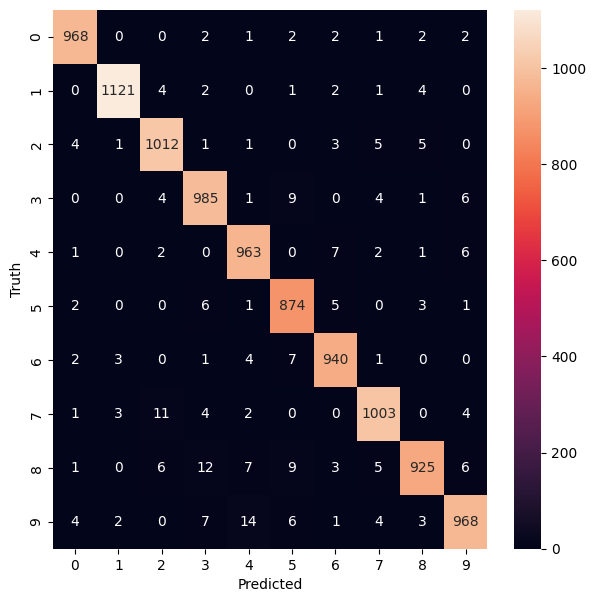

In [7]:
import tensorflow as tf    # To import 'tensorflow'
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import keras
import seaborn as sn

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
# print(len(x_train))
# print(len(x_test))
# plt.matshow(x_train[0])
# plt.matshow(x_train[1])
# plt.show()
# print(y_train[:2])

# Scalling the datasets
x_train = x_train/255   # As the dataset has values from 0 to 255
x_test= x_test/255      # We do this to scale the data between 0 & 1 for better accuricy

# # Now from 28*28 matrix we are reshaping it to 1D
# x_train_flattened = x_train.reshape(len(x_train), 28*28)
# x_test_flattened = x_test.reshape(len(x_test), 28*28)

#### Without any hidden layers
# # Creating a Simple Neural Network(with Only Input & Output Layers)
# model = keras.Sequential([      # 'Sequential' means having a stack of layers in the network
# # "10" for no. of output neurons & "28*28" for no. of input neurons
#     keras.layers.Dense(10, input_shape=(28*28,), activation='sigmoid')    # So as it is a stack it will accept every layer as an element
# ])                      # 'Dense()' means every neuron in one layer is connected with every other neuron in another layer

#### With a hidden layer
model = keras.Sequential([  
    # Without creating the flattened array
    keras.layers.Flatten(input_shape=(28,28)),
    # 1 hidden layer & 100 neurons in that layer    
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
]) 

# "Optimizer" allws us to reach to global optima in an efficient way
model.compile(optimizer='adam', 
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(x_train, y_train, epochs=5)
model.evaluate(x_test, y_test)
y_predicted = model.predict(x_test)
y_predicted_labels = [np.argmax(i) for i in y_predicted]

# For creating the confusion matrix & plot it
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)
plt.figure(figsize=(7, 7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()